<a href="https://colab.research.google.com/github/aghapygad336/8-puzzle-AI-/blob/master/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import math
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
from urllib.request import urlretrieve
import cv2
import os
import glob
import pandas as pd
from os import listdir
from os.path import isfile, join
from sklearn.metrics.cluster import contingency_matrix
import math
from PIL import Image
from matplotlib import *
import random
from sklearn.metrics import pairwise_distances

from sklearn.cluster import SpectralClustering





In [5]:
if not os.path.isfile('BSR_bsds500.tgz'):
    urlretrieve('http://www.eecs.berkeley.edu/Research/Projects/CS/vision/grouping/BSR/BSR_bsds500.tgz','BSR_bsds500.tgz')
if not os.path.isfile('content/BSR_bsds500.tgz'):
    !apt-get install p7zip-full
    !p7zip -d BSR_bsds500.tgz
    !tar -xvf BSR_bsds500.tgz

Reading package lists... Done
Building dependency tree       
Reading state information... Done
p7zip-full is already the newest version (16.02+dfsg-6).
0 upgraded, 0 newly installed, 0 to remove and 29 not upgraded.
/usr/bin/p7zip: BSR_bsds500.tgz: unknown suffix
BSR/
BSR/documentation/
BSR/documentation/Arbelaez_Maire_Fowlkes_Malik_TPAMI2010.pdf
BSR/bench/
BSR/bench/source/
BSR/bench/source/match.hh
BSR/bench/source/Matrix.cc
BSR/bench/source/Timer.cc
BSR/bench/source/csa_types.h
BSR/bench/source/csa.cc
BSR/bench/source/correspondPixels.cc
BSR/bench/source/build.sh
BSR/bench/source/match.cc
BSR/bench/source/Sort.hh
BSR/bench/source/csa_defs.h
BSR/bench/source/Timer.hh
BSR/bench/source/Exception.cc
BSR/bench/source/String.cc
BSR/bench/source/Array.hh
BSR/bench/source/kofn.hh
BSR/bench/source/Random.hh
BSR/bench/source/Exception.hh
BSR/bench/source/.gitignore
BSR/bench/source/kofn.cc
BSR/bench/source/build.m
BSR/bench/source/Random.cc
BSR/bench/source/Point.hh
BSR/bench/source/README
B

In [0]:

imagesFile_path = "BSR/BSDS500/data/images/train/"
imagesFile = [f for f in listdir(imagesFile_path) if isfile(join(imagesFile_path, f)) and f.endswith(".jpg")]
sortedImgfiles=sorted(imagesFile)

In [36]:



data = []

for i in range(len(sortedImgfiles)):
    testPlot=imagesFile_path+sortedImgfiles[i]
    img = cv2.imread(testPlot, cv2.IMREAD_UNCHANGED)

# get dimensions of image
    dimensions = img.shape
# height, width, number of channels in image
    height = img.shape[0]
    width = img.shape[1]
    channels = img.shape[2]
    numberTotalPixels=height*width
    data.append(img)
    mydata = np.array(data)

print('Image Dimension    : ',dimensions)
print('Image Height       : ',height)
print('Image Width        : ',width)
print('Number of Channels : ',channels)
print('Number of Pixels   : ',numberTotalPixels)


Image Dimension    :  (321, 481, 3)
Image Height       :  321
Image Width        :  481
Number of Channels :  3
Number of Pixels   :  154401


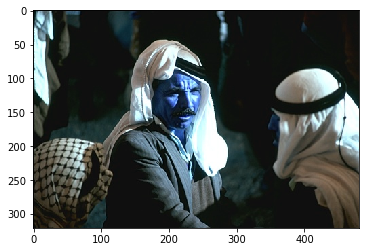

In [18]:
Picture_numbr=21
plt.imshow(mydata[Picture_numbr])
plt.show()


**Extract Ground Truth**

In [0]:
groundTruth_path = "BSR/BSDS500/data/groundTruth/train/"
groundTruthFile = [f for f in listdir(groundTruth_path) if isfile(join(groundTruth_path, f)) and f.endswith(".mat")]
sortedGroundTruthFile=sorted(groundTruthFile)

In [0]:
import scipy.io 

def load_bsd_gt(filename):
    gt = scipy.io.loadmat(filename);
    # scipy.io.loadmat()
    gt = gt['groundTruth']
    what = ['Segmentation','Boundaries']
    cols = (gt.shape[1])
    ret = list()
    for xx in range(cols):
        j=0
        tmp = list()
        for w in what:
            tmp.append(gt[0][xx][w][0][0][:])
            arr_gt=np.array(tmp[j])
            print(arr_gt.shape)
            j=j+1
            plt.imshow(arr_gt)
            plt.show()
            ret.append(tmp)
    return ret



(321, 481)


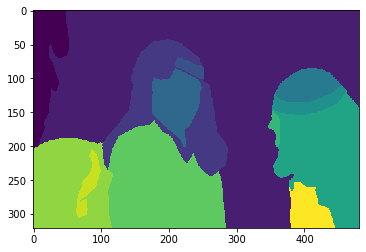

(321, 481)


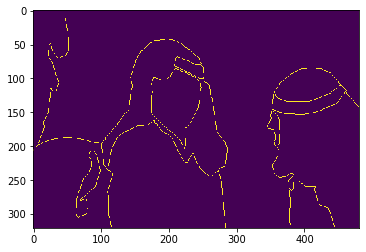

(321, 481)


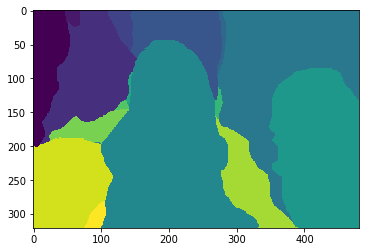

(321, 481)


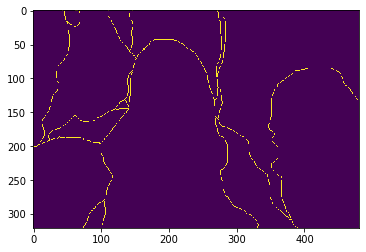

(321, 481)


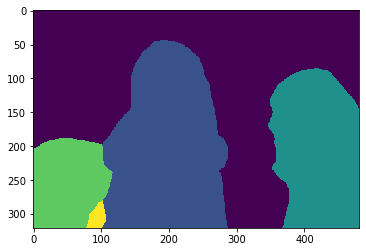

(321, 481)


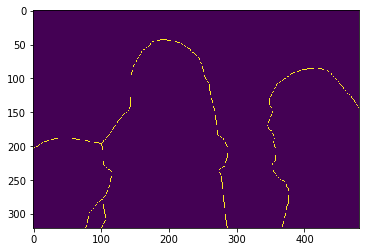

(321, 481)


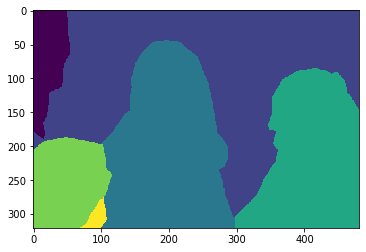

(321, 481)


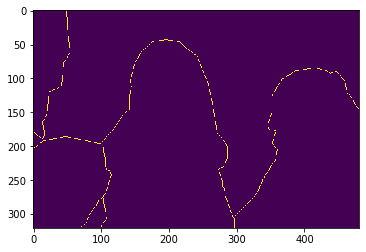

(321, 481)


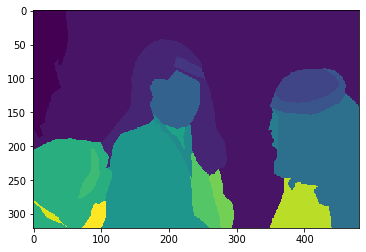

(321, 481)


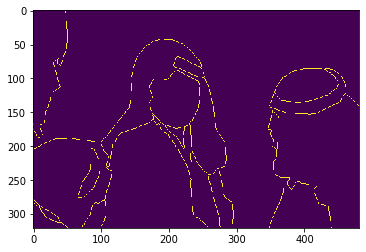

In [21]:
arr_gt=[]
testPlot_=groundTruth_path+sortedGroundTruthFile[Picture_numbr]
arr_gt=load_bsd_gt(testPlot_)


 ***Color Quantization*** is the process of reducing number of colors in an image. One reason to do so is to reduce the memory. Sometimes, some devices may have limitation such that it can produce only limited number of colors. In those cases also, color quantization is performed. Here we use **k-means clustering for color quantization**. italicized text

**`K-Means`**


param clusters: cluster dicts in the form center:(colors)
return: the clusters after convergence is reached


In [0]:


def change_clusters_if_needed(clusters, image):
 
  new_centers = []
  something_changed = False
  for center in clusters:
    colors = clusters[center]
    average = get_average_color(colors)
    if average != center:
      something_changed = True
    new_centers.append(average)
  if something_changed:
    new_empty_clusters = create_cluster_dict(new_centers)
    new_populated_clusters = populate_clusters(image, new_empty_clusters, new_centers)
    return change_clusters_if_needed(new_populated_clusters, image)
  else:
    return clusters




Param colors: a list of colors in the form (R, G, B)
return: a color in the form (R, G, B)
  

In [0]:


def get_average_color(colors):

  num_colors = len(colors)
  if num_colors == 0:
    return (0, 0, 0)
  r, g, b = 0, 0, 0
  for color in colors:
    r += color[0]
    g += color[1]
    b += color[2]
  return(int(r/num_colors), int(g/num_colors), int(b/num_colors))



The image for which we are creating the clusters, default cluster dict where the key is the center and the value is the list of colors in the cluster centers: a list of the colors that we are using to cluster return: the cluster dict after populating with colors in the image


In [0]:



def populate_clusters(image, clusters, centers):

  for y in range(image.height):
    for x in range(image.width):
      color = image.getpixel((x, y))
      center = get_nearest_center(color, centers)
      clusters[center].append(color)
  return clusters



param color: a color in the form (R, G, B) , centers: a list of colors
return: the center that is closet to color according to distance between colors


In [0]:

def get_nearest_center(color, centers):
 
  nearest_center = centers[0]
  shortest_distance = distance_between_colors(color, centers[0])
  for c in centers[1:]:
    distance = distance_between_colors(color, c)
    if distance < shortest_distance:
      shortest_distance = distance
      nearest_center = c
  return nearest_center


param image: the image in which we are getting n random pixels,n: the number of random pixels return: a list of n pairs, each of which contains an (x, y) coordinate


In [0]:


def get_random_colors(image, n):
  
  initial_colors = []
  while(len(initial_colors) < n):
    x = random.randint(0, image.width)
    y = random.randint(0, image.height)
    color = image.getpixel((x, y))
    initial_colors.append(color)
  return initial_colors




param color1: a color in the format (R, G, B) color2: a color in the format (R, G, B)return: a floating point number representing the color space distance between color1 and color2


In [0]:

def distance_between_colors(color1, color2):

  sum = 0
  for index in range(3):
    sum += (color1[index] - color2[index])**2
  return sum ** (1/2)


param image: a blank image whose pixels' colors will be set, clusters: the groups of similar pixels in a dict object return: nothing, this function edits 'image'

In [0]:


def populate_image_from_clusters(image, clusters):

  centers = list(clusters.keys())
  for y in range(image.height):
    for x in range(image.width):
      old_color = image.getpixel((x, y))
      closest_center = get_nearest_center(old_color, centers)
      image.putpixel((x, y), closest_center)



In [0]:
def create_cluster_dict(centers):
  d = {}
  for c in centers:
    d[c] = []
  return d

In [0]:
def main_Kmeans(Picture_numbr):
    testPlot=imagesFile_path+sortedImgfiles[Picture_numbr]

    filename = testPlot
    input_image = Image.open(filename)
    data_new_image=[]
    data_final_clusters=[]
    Kmeans_=[3,5,7,9,11]
    for k in Kmeans_:  
  
        input_image = Image.open(filename)
        default_colors = get_random_colors(input_image,k)
        default_cluster = create_cluster_dict(default_colors)
        clusters = populate_clusters(input_image, default_cluster, default_colors)
        final_clusters = change_clusters_if_needed(clusters, input_image)
        new_image = input_image.copy()
        populate_image_from_clusters(new_image, final_clusters)
        data_new_image.append(new_image)
        data_final_clusters.append(final_clusters)
        print("For K =",k)
        plt.imshow(new_image)
        plt.show() 
    
    return data_new_image,data_final_clusters

For K = 3


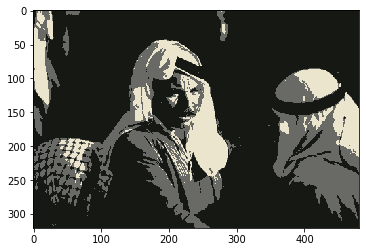

For K = 5


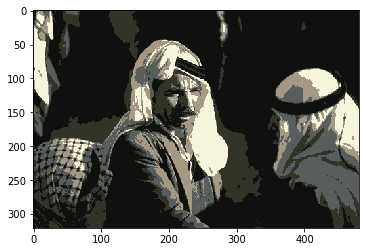

For K = 7


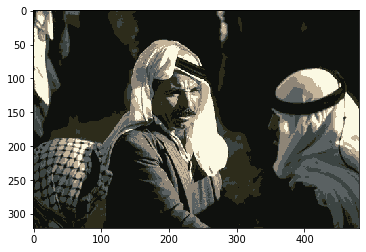

For K = 9


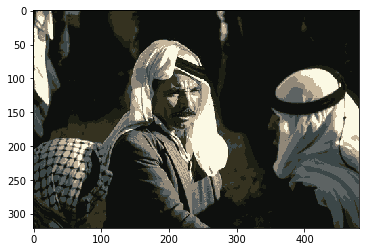

For K = 11


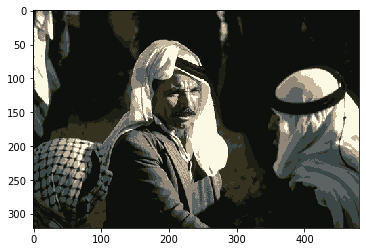

In [31]:
DataKmean,data_final_clusters=main_Kmeans(Picture_numbr)

# Converting Gray Scale
convert  RGB Clustered Image to Grey Scale to be easy For Measuring Accuracy

In [0]:
def convertGray(DataKmean):
    kmeanClustered=[]
    for i in range(0,5):  
        a = np.array(DataKmean[i].getdata()).astype(np.float32).reshape((DataKmean[i].size[1],DataKmean[i].size[0],3) )
        gray = cv2.cvtColor(a, cv2.COLOR_BGR2GRAY)
        p=np.ceil(gray)
        plt.imshow(p)
        kmeanClustered.append(p)
        plt.show()
        print(i)
    return kmeanClustered
    


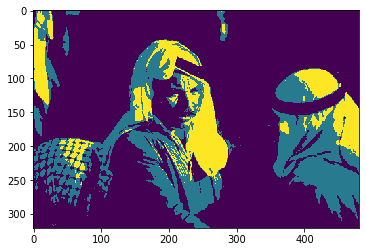

0


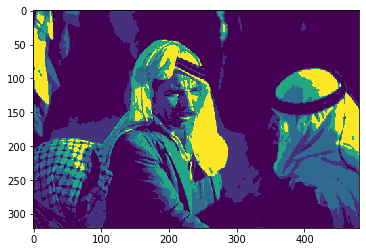

1


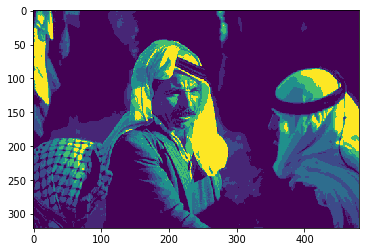

2


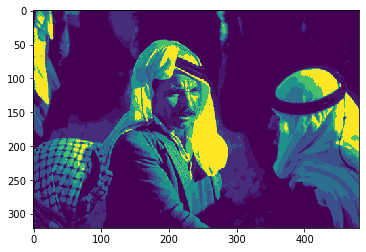

3


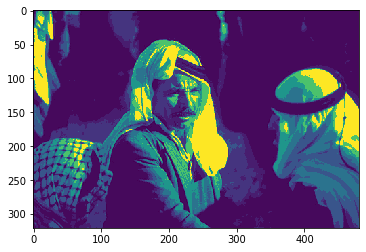

4


In [33]:
kmeanClustered=convertGray(DataKmean)

In [0]:
from sklearn.metrics.cluster import contingency_matrix
def fmeasure (i_Kmean,kmeanClustered,arr_gt):
    j_2D=[0,1]
    fScore=[]
    Kmeans_=[3,5,7,9,11]

    for i_ in i_Kmean:
        for j in j_2D:
            true_ = kmeanClustered[i_].flatten()
            prediction_ = arr_gt[i_][j].flatten()
            cont = contingency_matrix(prediction_, true_)
            contingency = cont.T
            Actual_P = np.sum(contingency,axis=0)
            Actual_N = np.sum(contingency,axis =1)
            prec = []
            recall =[]
            count = 0
            for i in contingency:
                prec = np.append(prec,(max(i)/Actual_N[count]))
                recall = np.append(recall,(max(i)/Actual_P[np.argmax(i)]))
                count+=1
            f1_measure = (2*prec *recall)/(prec+recall)
            total_f1_measure = (1/len(f1_measure))* np.sum(f1_measure)
            print('For K =' ,Kmeans_[i_])
            print('Fmeasure Value = ',total_f1_measure)
            fScore.append(total_f1_measure)
    return fScore            
       

In [35]:

i_Kmean=[0,1,2,3,4]
fScore=fmeasure(i_Kmean,kmeanClustered,arr_gt)


For K = 3
Fmeasure Value =  0.5729029232262675
For K = 3
Fmeasure Value =  0.4486416287044533
For K = 5
Fmeasure Value =  0.43919757125621717
For K = 5
Fmeasure Value =  0.302457850686913
For K = 7
Fmeasure Value =  0.2666863780504641
For K = 7
Fmeasure Value =  0.22305973581013078
For K = 9
Fmeasure Value =  0.24452513869229733
For K = 9
Fmeasure Value =  0.2002331052290488
For K = 11
Fmeasure Value =  0.25857253589667173
For K = 11
Fmeasure Value =  0.1795187671871079


**F-measure**

In [0]:
def plotFmeasure(fScore):
    kmeans_odd = [3,5,7,9,11]
    kmeans_even = [3,5,7,9,11]
    fScore_odd = [fScore[i] for i in range(len(fScore)) if i%2!=0 and i!=0]
    fScore_even = [fScore[i] for i in range(len(fScore)) if i%2==0]

    plt.figure()
    plt.scatter(kmeans_odd,fScore_odd,c='blue')
    plt.scatter(kmeans_even,fScore_even,c='red')
    plt.ylabel('Fmeasure')
    plt.xlabel('K')
    plt.show()

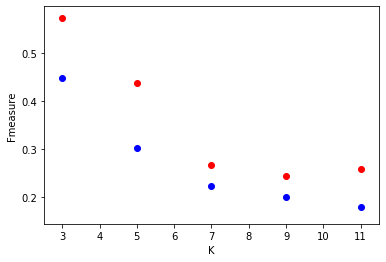

In [37]:
plotFmeasure(fScore)

Comment On Fmeasure accuracy decreases increasing the number of clusters

**Conditional Entropy**

In [38]:

true_ =kmeanClustered[0].flatten()
prediction_ = arr_gt[0][0].flatten()
cont = contingency_matrix(prediction_, true_)
contingency = cont.T
# print(contingency)

ni = np.sum(contingency,axis =1)
n = np.sum(ni)
# print(ni,n)

count = 0
centroids_entropy = []

for i in contingency:
    # -(n(i,j)/ni)log(n(i,j)/ni)
    c = 0
    for j in range(contingency.shape[1]):
        if i[j]/ni[count] !=0:
           c = c -(i[j]/ni[count])*np.log2(i[j]/ni[count])
    centroids_entropy.append(c)

    count +=1
entropy = 0 
for i in centroids_entropy:
    entropy +=(ni[centroids_entropy.index(i)]/n)*i
    
print("Conditional entropy For K = 3",entropy)

Conditional entropy For K = 3 2.1295216233833982


**Get 5 pictures**

For K = 3


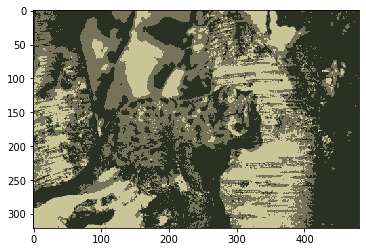

For K = 5


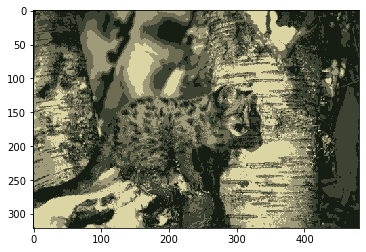

For K = 7


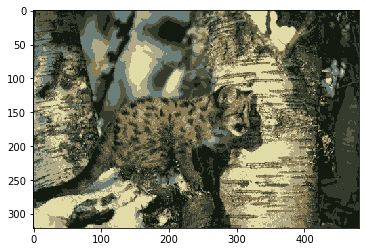

For K = 9


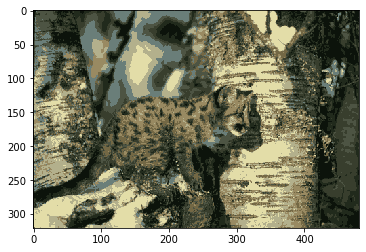

For K = 11


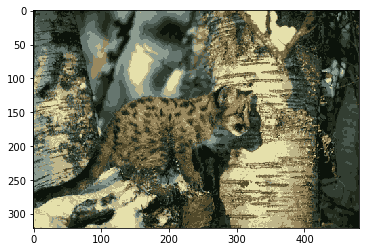

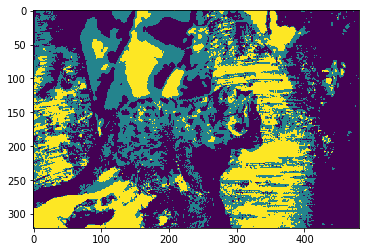

0


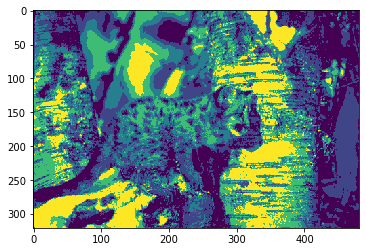

1


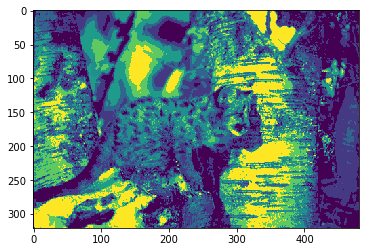

2


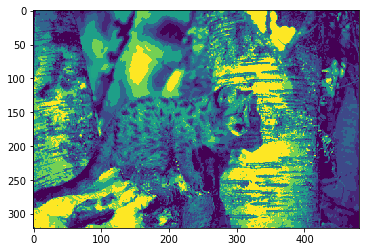

3


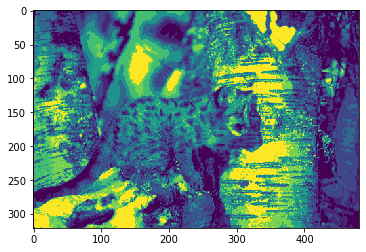

4
(321, 481)


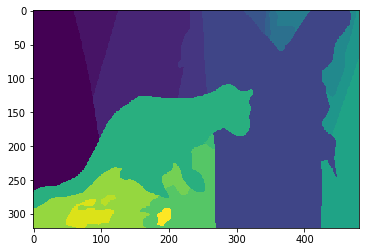

(321, 481)


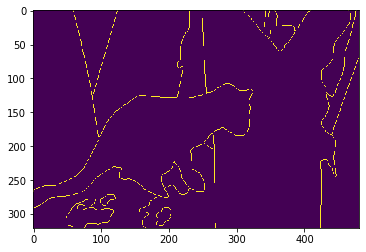

(321, 481)


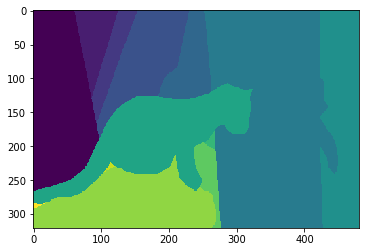

(321, 481)


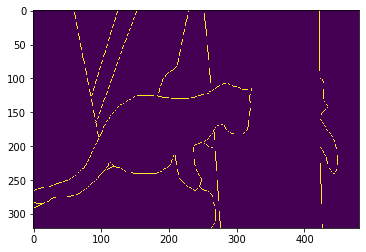

(321, 481)


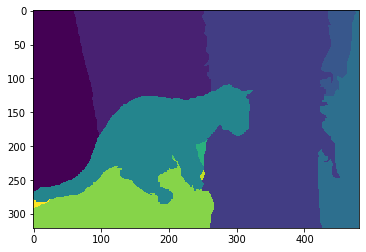

(321, 481)


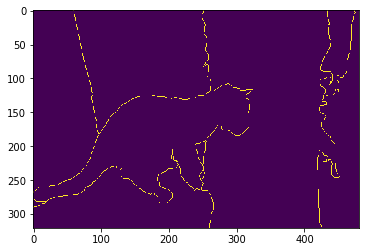

(321, 481)


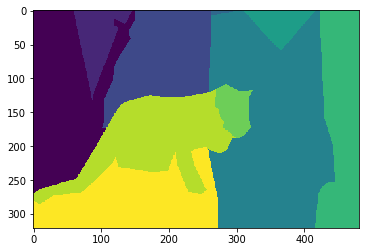

(321, 481)


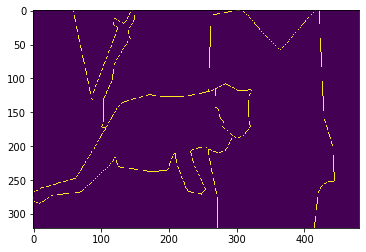

(321, 481)


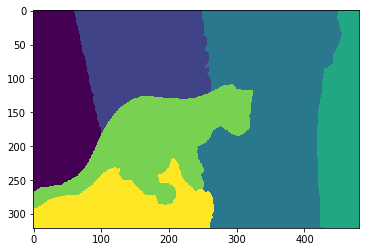

(321, 481)


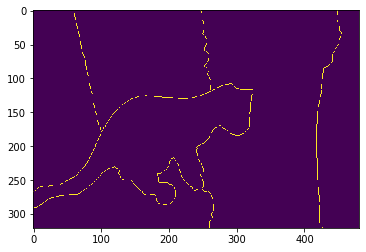

(321, 481)


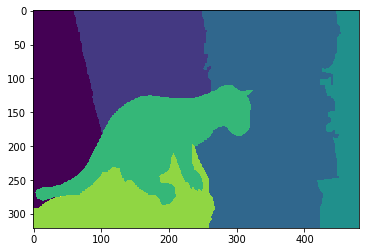

(321, 481)


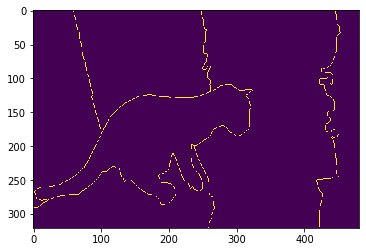

For K = 3
Fmeasure Value =  0.3311877329588958
For K = 3
Fmeasure Value =  0.4912185154657221
For K = 5
Fmeasure Value =  0.248253019210661
For K = 5
Fmeasure Value =  0.330366118589028
For K = 7
Fmeasure Value =  0.2700272119763351
For K = 7
Fmeasure Value =  0.24691503769223122
For K = 9
Fmeasure Value =  0.2240396092774591
For K = 9
Fmeasure Value =  0.19898666078475807
For K = 11
Fmeasure Value =  0.2343145045873922
For K = 11
Fmeasure Value =  0.16582870220348378


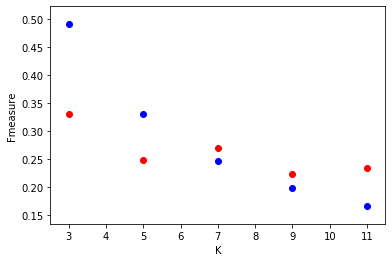

For K = 3


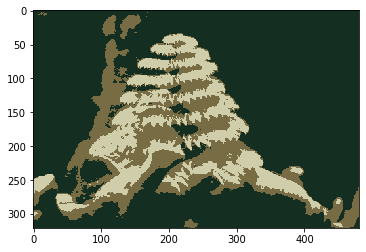

For K = 5


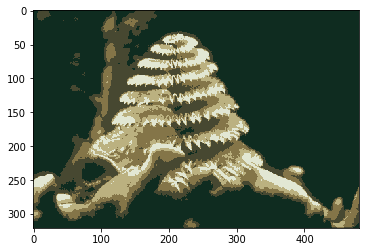

For K = 7


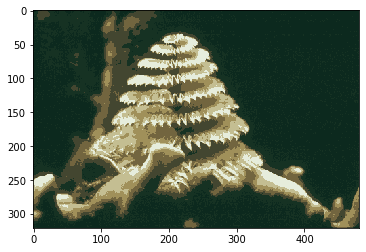

For K = 9


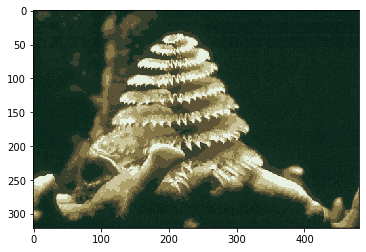

For K = 11


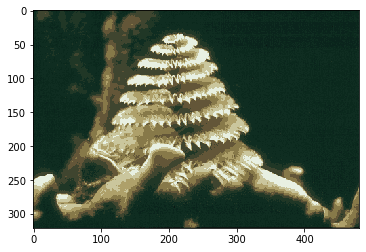

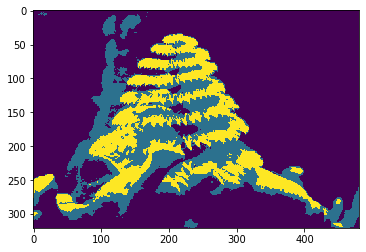

0


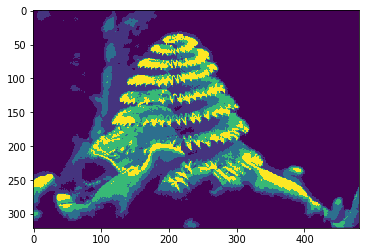

1


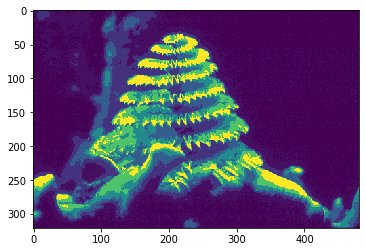

2


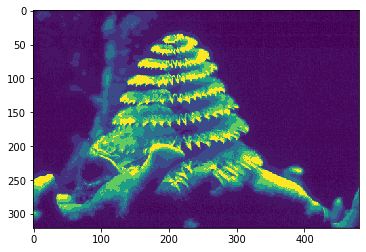

3


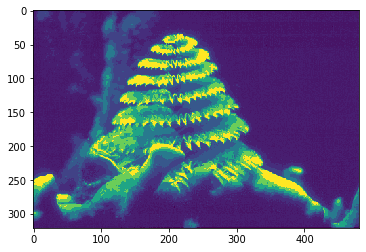

4
(321, 481)


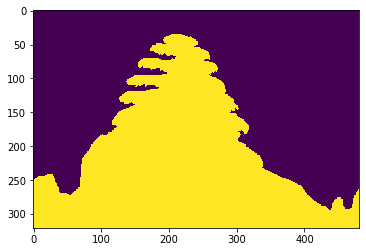

(321, 481)


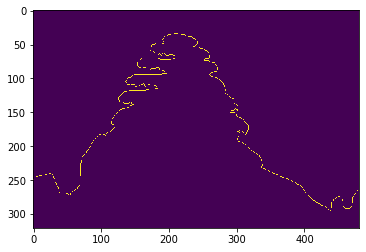

(321, 481)


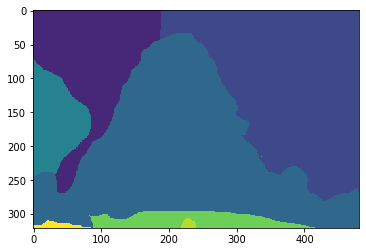

(321, 481)


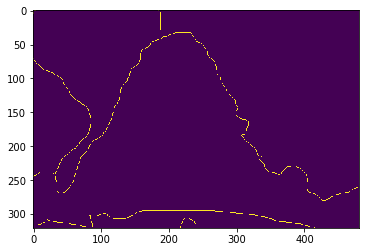

(321, 481)


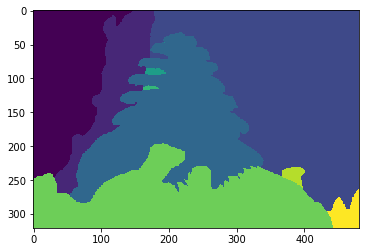

(321, 481)


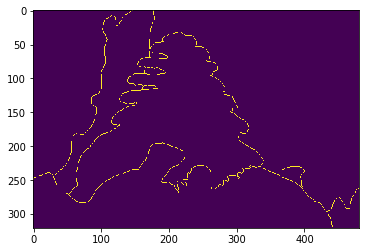

(321, 481)


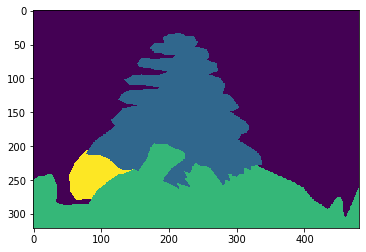

(321, 481)


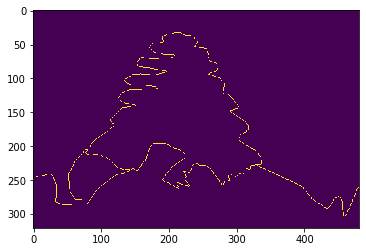

(321, 481)


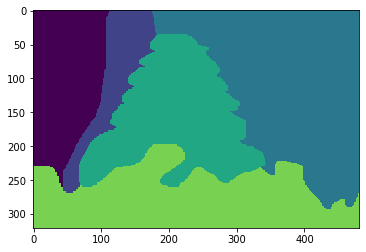

(321, 481)


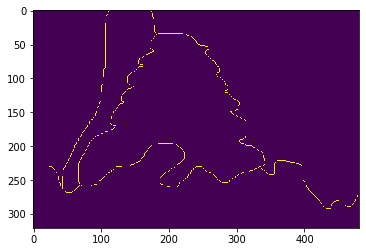

For K = 3
Fmeasure Value =  0.596115873944384
For K = 3
Fmeasure Value =  0.4535056692492739
For K = 5
Fmeasure Value =  0.3995656754075774
For K = 5
Fmeasure Value =  0.29383717394852776
For K = 7
Fmeasure Value =  0.3411324431164579
For K = 7
Fmeasure Value =  0.23321772431389154
For K = 9
Fmeasure Value =  0.27890391568635453
For K = 9
Fmeasure Value =  0.18921971440836968
For K = 11
Fmeasure Value =  0.280928628012842
For K = 11
Fmeasure Value =  0.15824355886065872


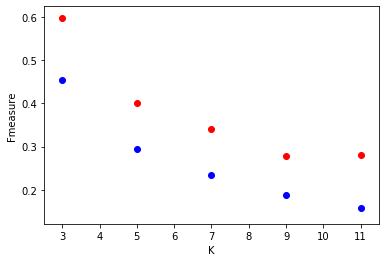

For K = 3


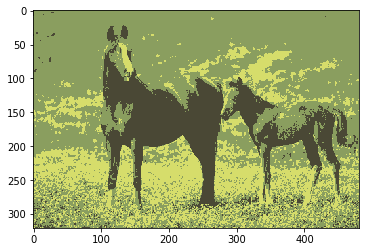

For K = 5


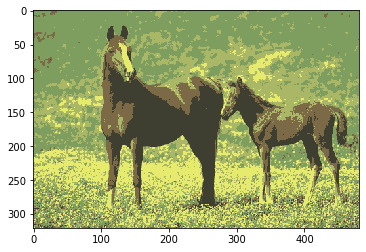

For K = 7


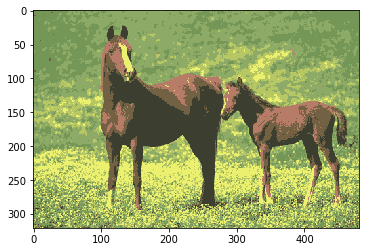

For K = 9


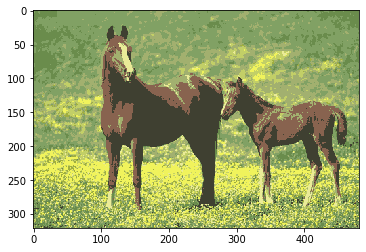

For K = 11


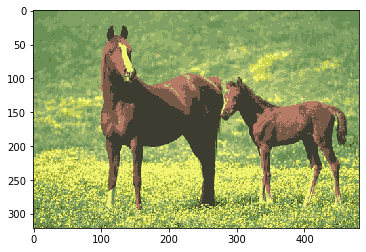

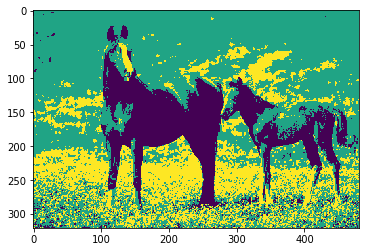

0


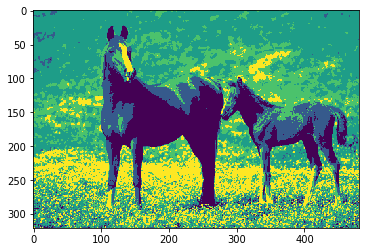

1


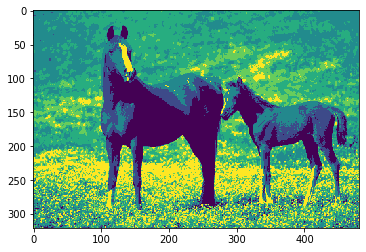

2


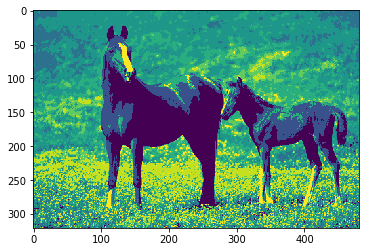

3


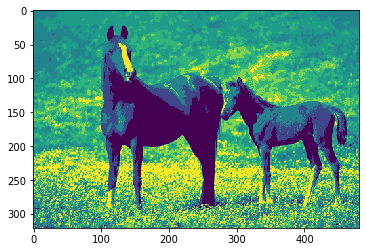

4
(321, 481)


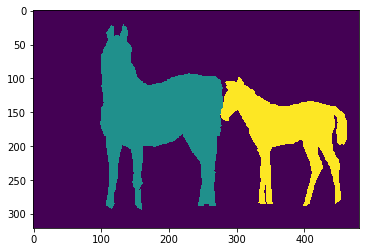

(321, 481)


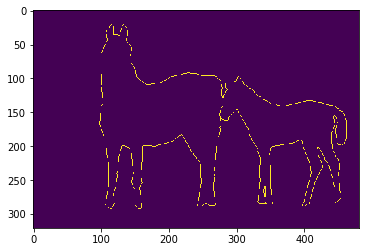

(321, 481)


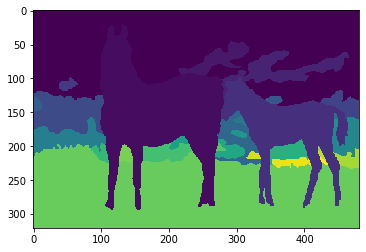

(321, 481)


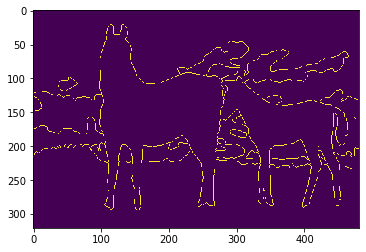

(321, 481)


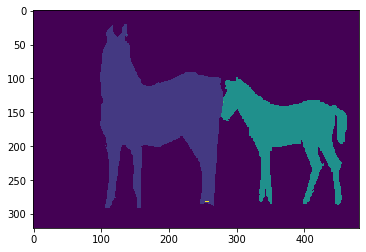

(321, 481)


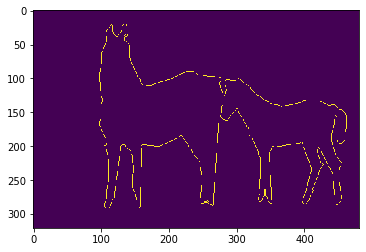

(321, 481)


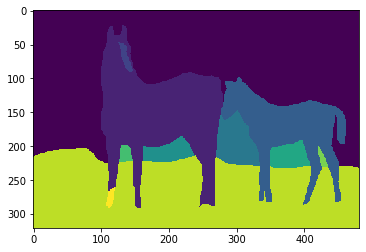

(321, 481)


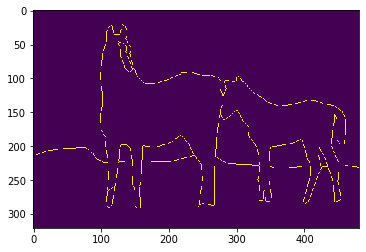

(321, 481)


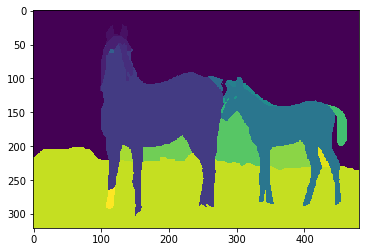

(321, 481)


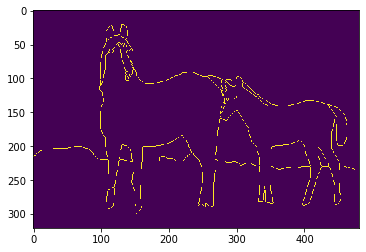

(321, 481)


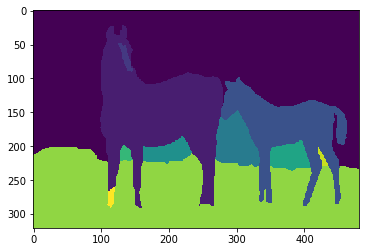

(321, 481)


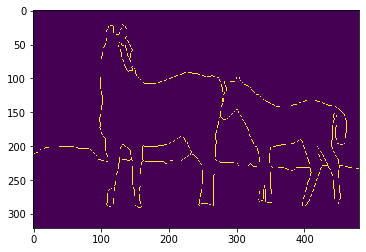

For K = 3
Fmeasure Value =  0.6324687893543282
For K = 3
Fmeasure Value =  0.4743357771357909
For K = 5
Fmeasure Value =  0.4734226034010422
For K = 5
Fmeasure Value =  0.32359674981746656
For K = 7
Fmeasure Value =  0.4523532820446038
For K = 7
Fmeasure Value =  0.24288044517783022
For K = 9
Fmeasure Value =  0.3681025196376788
For K = 9
Fmeasure Value =  0.213737843973026
For K = 11
Fmeasure Value =  0.2659237579510771
For K = 11
Fmeasure Value =  0.17748312893515816


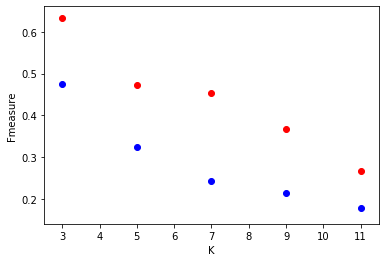

For K = 3


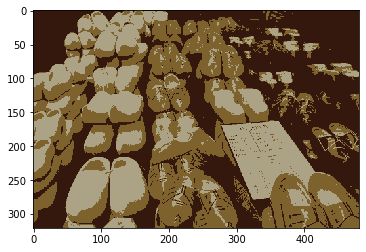

For K = 5


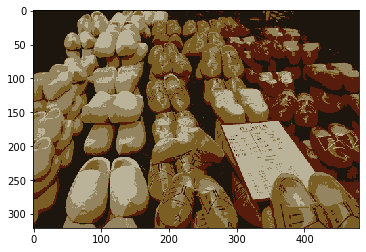

For K = 7


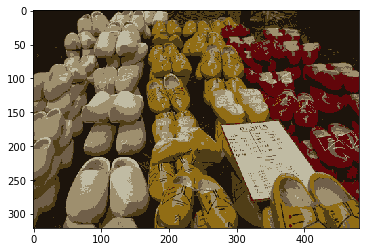

For K = 9


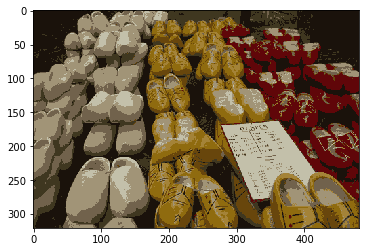

For K = 11


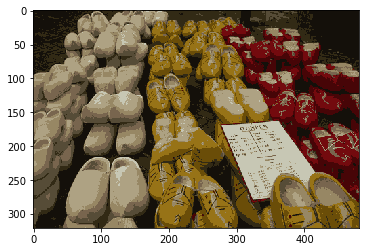

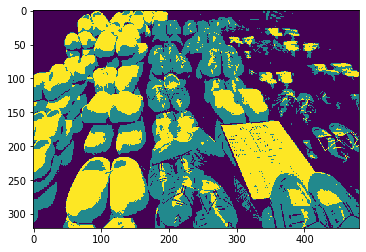

0


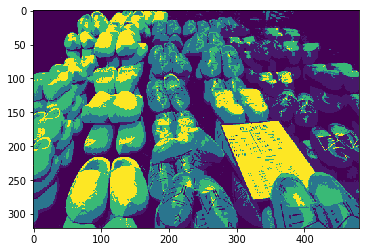

1


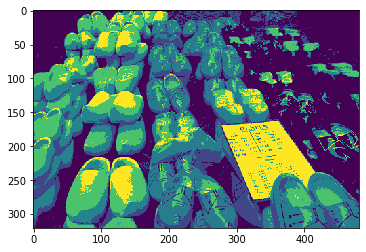

2


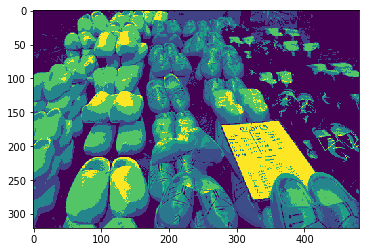

3


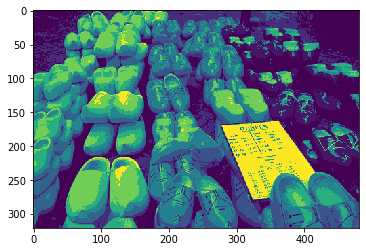

4
(321, 481)


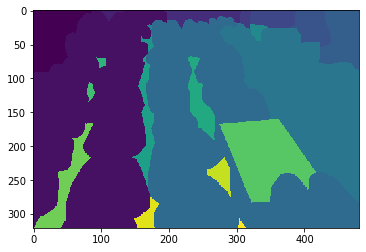

(321, 481)


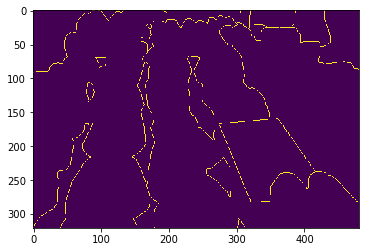

(321, 481)


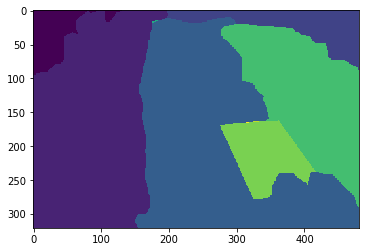

(321, 481)


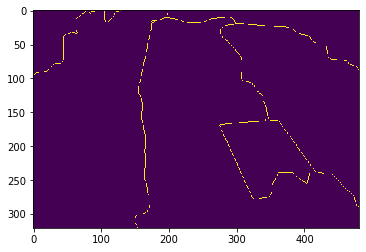

(321, 481)


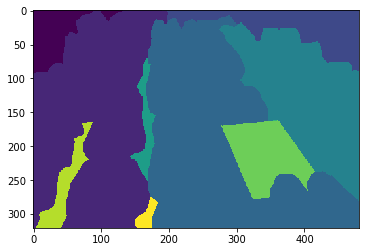

(321, 481)


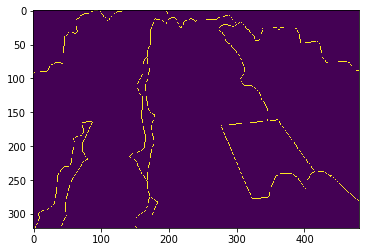

(321, 481)


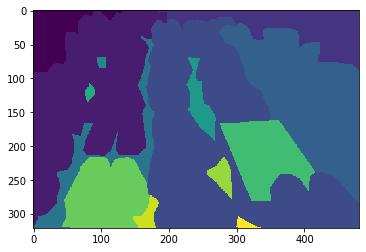

(321, 481)


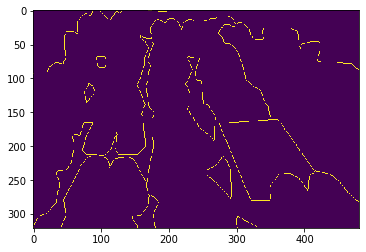

(321, 481)


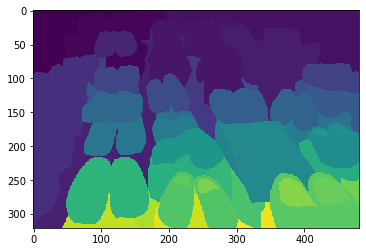

(321, 481)


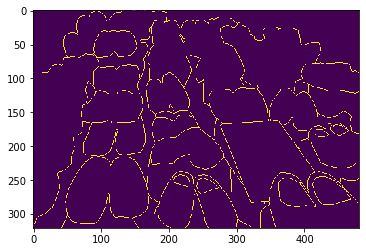

For K = 3
Fmeasure Value =  0.5272585649020101
For K = 3
Fmeasure Value =  0.4952663848438741
For K = 5
Fmeasure Value =  0.42103966114001223
For K = 5
Fmeasure Value =  0.33023638174756176
For K = 7
Fmeasure Value =  0.46471132785516706
For K = 7
Fmeasure Value =  0.24768884936286154
For K = 9
Fmeasure Value =  0.41295183019902115
For K = 9
Fmeasure Value =  0.1972429192884231
For K = 11
Fmeasure Value =  0.41208419722547546
For K = 11
Fmeasure Value =  0.1653849678604703


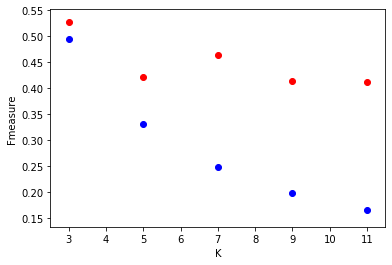

For K = 3


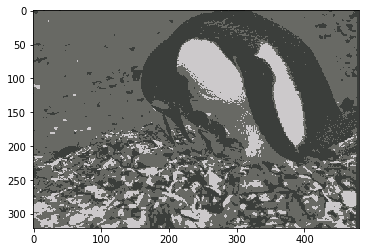

For K = 5


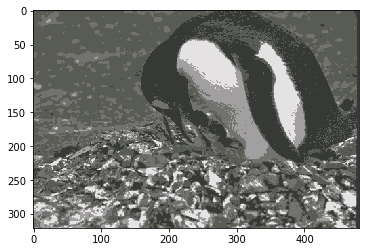

For K = 7


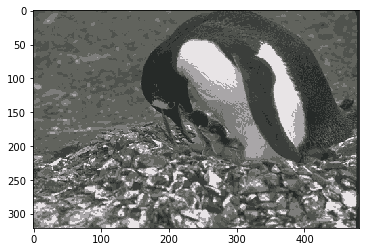

For K = 9


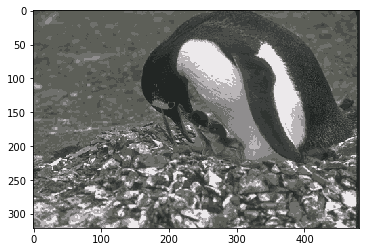

For K = 11


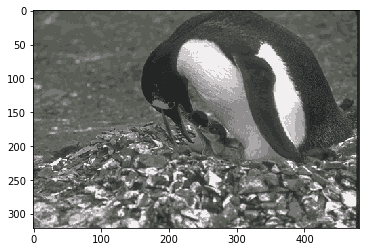

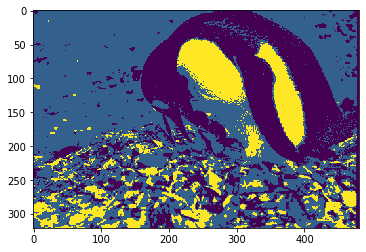

0


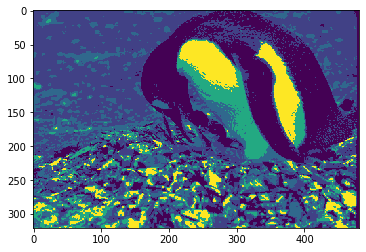

1


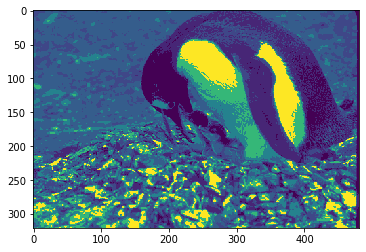

2


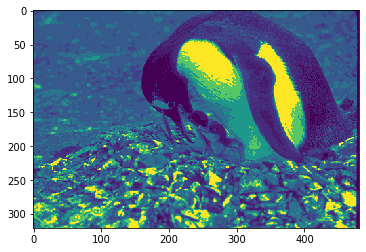

3


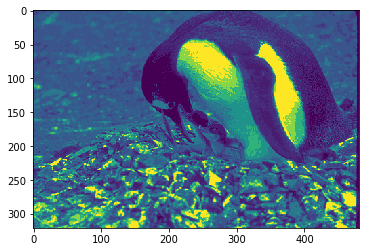

4
(321, 481)


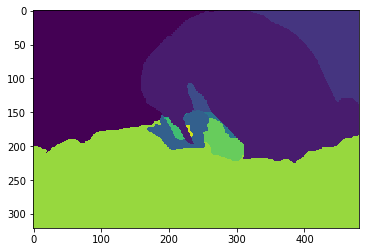

(321, 481)


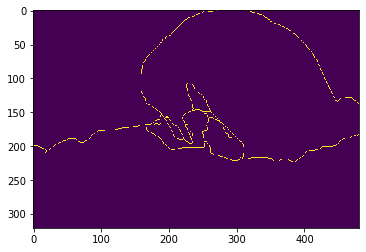

(321, 481)


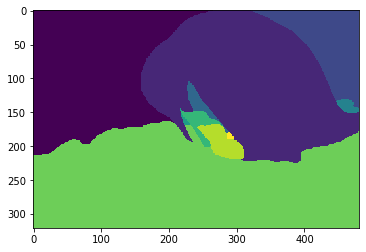

(321, 481)


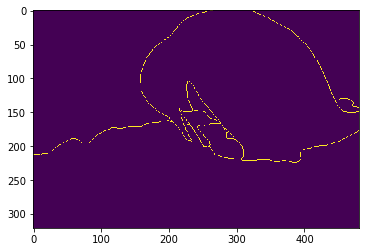

(321, 481)


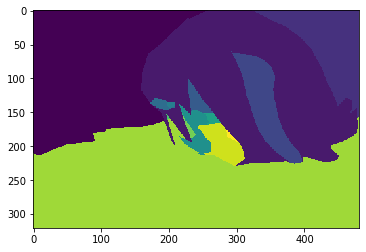

(321, 481)


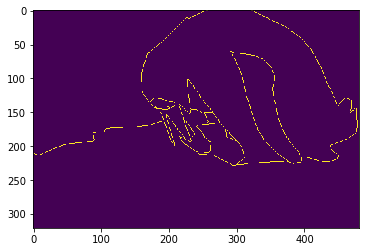

(321, 481)


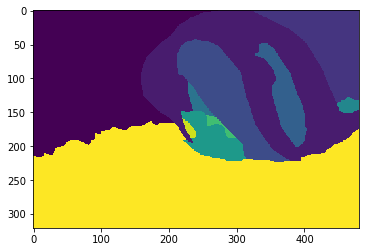

(321, 481)


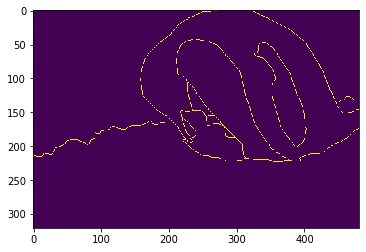

(321, 481)


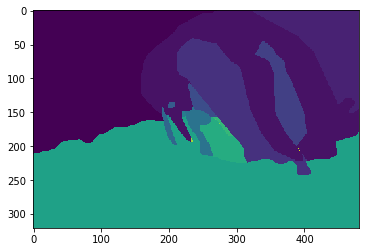

(321, 481)


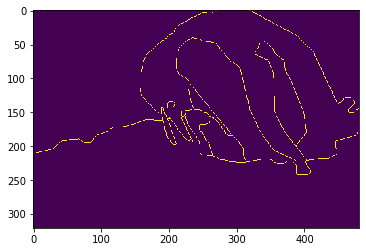

For K = 3
Fmeasure Value =  0.47853673505084837
For K = 3
Fmeasure Value =  0.47628481441185844
For K = 5
Fmeasure Value =  0.39621633491149466
For K = 5
Fmeasure Value =  0.31973668018808
For K = 7
Fmeasure Value =  0.33275289100935046
For K = 7
Fmeasure Value =  0.24147833543536038
For K = 9
Fmeasure Value =  0.2782561847969434
For K = 9
Fmeasure Value =  0.19270265835078726
For K = 11
Fmeasure Value =  0.24331076143142533
For K = 11
Fmeasure Value =  0.16255515061998


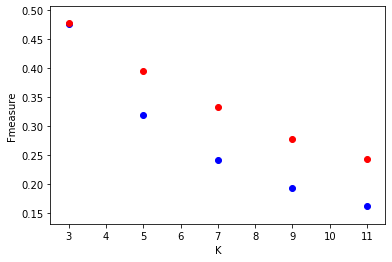

In [39]:
chsenNumbers=[46,20,14,32,7]
i_Kmean=[0,1,2,3,4]
f_Score=[]
for i in i_Kmean:
    DataKmean,data_final_clusters=main_Kmeans(chsenNumbers[i])
    kmeanClustered=convertGray(DataKmean)
    testPlot_=groundTruth_path+sortedGroundTruthFile[chsenNumbers[i]]
    arr_gt=load_bsd_gt(testPlot_)
    tst_Kmean=[0,1,2,3,4]
    f=fmeasure(tst_Kmean,kmeanClustered,arr_gt)
    f_Score.append(f)
    plotFmeasure(f)

 


    

Spectural Clustering


In [0]:

imagesFile_path = "BSR/BSDS500/data/images/train/"
imagesFile = [f for f in listdir(imagesFile_path) if isfile(join(imagesFile_path, f)) and f.endswith(".jpg")]
sortedImgfiles=sorted(imagesFile)
testPlot=imagesFile_path+sortedImgfiles[46]
image = Image.open(testPlot)
image_data = np.asarray(image)
res = cv2.resize(image_data, dsize=(100, 100), interpolation=cv2.INTER_CUBIC)
data_img=cv2.GaussianBlur(res,(7,7),0)
unrolled=data_img.reshape(-1,3)
vectorized.append(unrolled)
vec_train_img=np.array(vectorized)




In [0]:
from sklearn.metrics import pairwise_distances
distance_matrix= pairwise_distances(unrolled, metric='euclidean')

affinity = []
for row in distance_matrix:
  for d in row:
    aff= np.exp(-0.01 * d ** 2)
    affinity.append(aff)



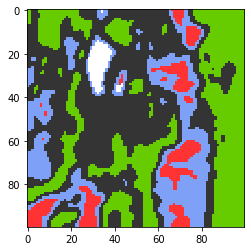

In [55]:
affinity = np.array(affinity)
affinity=affinity.reshape(10000,10000)
clustering = SpectralClustering(n_clusters=5, assign_labels="discretize", affinity="precomputed").fit(affinity)

colors = [[52,52,52],[126, 160, 246],[255,255,255],[255,51,51],[102,204,0],[0,255,255],[173, 236, 135],[51,51,255],[126, 0, 151],[200,200,200],[100,100,100]]
newImage = []
for k in range(0,10000):
  newImage.append(colors[clustering.labels_[k]])
  
newImage=np.array(newImage).reshape(100,100,3)
plt.imshow(newImage)